
CSYE7105 High Performance Parallel Machine Learning and AI

Instructor: Dr. Handan Liu

Lecture 11: Dask 1 - Arrays in Parallel


In [1]:
import numpy as np
import dask.array as da

### Blocked Algorithms in a nutshell
Let's do side by side the sum of the elements of an array using a NumPy array and a Dask array.

In [2]:
# NumPy array
x = np.ones(10)
x

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [3]:
%timeit x.sum()

1.38 μs ± 15.2 ns per loop (mean ± std. dev. of 7 runs, 1,000,000 loops each)


In [4]:
%timeit x[:5].sum() + x[5:].sum()

3.36 μs ± 40.4 ns per loop (mean ± std. dev. of 7 runs, 100,000 loops each)


In [5]:
x.sum()

np.float64(10.0)

In [6]:
x_da = da.ones(10, chunks=5)
x_da

dask.array<ones_like, shape=(10,), dtype=float64, chunksize=(5,), chunktype=numpy.ndarray>

In [7]:
y = x_da.sum()
y

dask.array<sum-aggregate, shape=(), dtype=float64, chunksize=(), chunktype=numpy.ndarray>

In [8]:
y.compute()

np.float64(10.0)

In [9]:
y.visualize(engine="cytoscape")

CytoscapeWidget(cytoscape_layout={'name': 'dagre', 'rankDir': 'BT', 'nodeSep': 10, 'edgeSep': 10, 'spacingFact…

In [ ]:
y.compute()

### Task Graphs

In [10]:
import dask.array as da
x = da.random.normal(size=500, chunks=100)
x

dask.array<normal, shape=(500,), dtype=float64, chunksize=(100,), chunktype=numpy.ndarray>

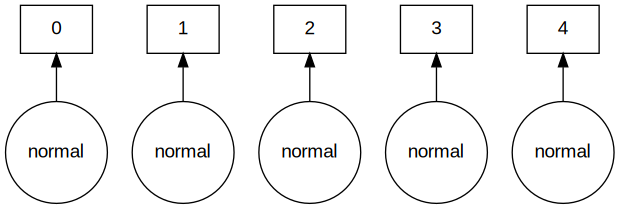

In [11]:
x.visualize()

In [13]:
x.mean().compute()

np.float64(0.019404914939836763)


## Visualize the low level graph


In [14]:
import dask.array as da
x = da.ones((15, 15), chunks=(5, 5))
x

dask.array<ones_like, shape=(15, 15), dtype=float64, chunksize=(5, 5), chunktype=numpy.ndarray>

In [15]:
y = x + x.T
y.compute()

array([[2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.],
       [2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.],
       [2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.],
       [2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.],
       [2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.],
       [2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.],
       [2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.],
       [2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.],
       [2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.],
       [2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.],
       [2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.],
       [2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.],
       [2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.],
       [2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.],
       [2., 2., 2., 2., 2., 2., 2.

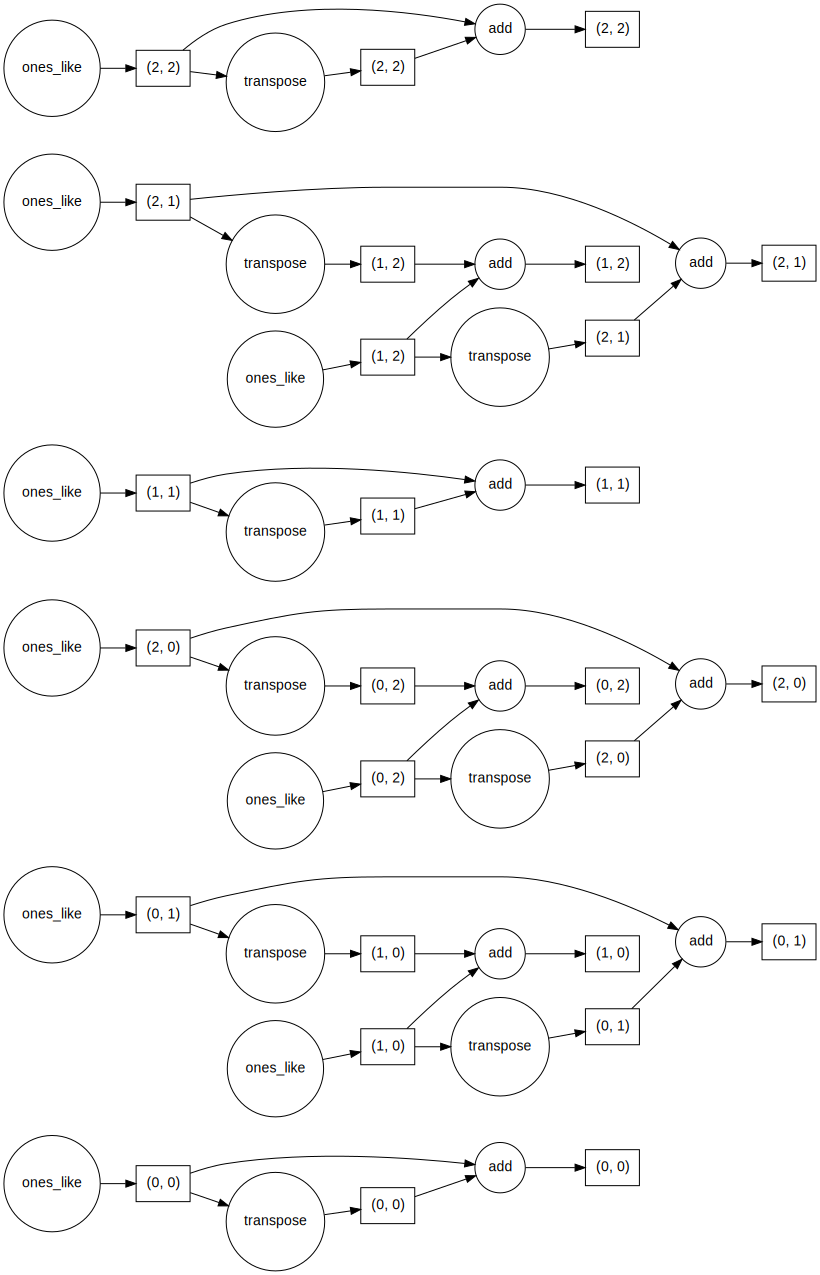

In [17]:
# visualize the low level Dask graph
y.visualize(filename='transpose.svg', rankdir='LR')

In [18]:
# visualize the low level Dask graph using cytoscape
y.visualize(engine="cytoscape")

CytoscapeWidget(cytoscape_layout={'name': 'dagre', 'rankDir': 'BT', 'nodeSep': 10, 'edgeSep': 10, 'spacingFact…

In [19]:
import dask
with dask.config.set({"visualization.engine": "cytoscape"}):
    y.visualize()


## Visualize the high level graph


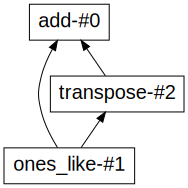

In [20]:
import dask.array as da
x = da.ones((15, 15), chunks=(5, 5))
y = x + x.T

# visualize the high level Dask graph
y.dask.visualize(filename='transpose-hlg.svg')

In [21]:
y.dask  

HighLevelGraph with 3 layers.
<dask.highlevelgraph.HighLevelGraph object at 0x14950e1adf90>
 0. ones_like-5d4162f810e2a3c0d6a912885eb44436
 1. transpose-cd41521c3c91d866c94a9660d7665693
 2. add-c0d291c9685809976757ff3ca8e9b63c

### Create Dask Arrays

In [ ]:
da.from_array

### Create Random array

In [22]:
darr = da.random.random((1000, 1000, 1000))
darr

dask.array<random_sample, shape=(1000, 1000, 1000), dtype=float64, chunksize=(255, 255, 255), chunktype=numpy.ndarray>

In [23]:
import dask.array as da
x = da.random.random((10000, 10000), chunks=(1000, 1000))
x

dask.array<random_sample, shape=(10000, 10000), dtype=float64, chunksize=(1000, 1000), chunktype=numpy.ndarray>

In [24]:
y = x + x.T
z = y[::2, 5000:].mean(axis=1)
z

dask.array<mean_agg-aggregate, shape=(5000,), dtype=float64, chunksize=(500,), chunktype=numpy.ndarray>

In [27]:
zz = z.compute()
zz.shape

(5000,)

In [28]:
%%timeit 
y = x + x.T
z = y[::2, 5000:].mean(axis=1)
z.compute()

314 ms ± 6.73 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [29]:
xnp = np.random.random((10000, 10000))
xnp.shape

(10000, 10000)

In [30]:
%%timeit
yy = xnp + xnp.T
zz = yy[::2, 5000:].mean(axis=1)
zz

680 ms ± 453 μs per loop (mean ± std. dev. of 7 runs, 1 loop each)


### Performance comparison
Large Array

#### NumPy

In [31]:
%%time
xn = np.random.normal(10, 0.1, size=(30_000, 30_000))
yn = xn.mean(axis=0)
yn

CPU times: user 25.4 s, sys: 1.43 s, total: 26.8 s
Wall time: 26.9 s


array([ 9.9994666 , 10.00006053, 10.00112539, ..., 10.00043355,
        9.99975317, 10.00003176])

#### Dask

In [32]:
%%time
xd = da.random.normal(10, 0.1, size=(30_000, 30_000), chunks=(3000, 3000))
yd = xd.mean(axis=0)
yd.compute()

CPU times: user 25.1 s, sys: 1.51 s, total: 26.7 s
Wall time: 6.74 s


array([10.00028729,  9.99993585, 10.00036141, ..., 10.0002225 ,
        9.99857288,  9.99947427])

In [33]:
%%time
xd = da.random.normal(10, 0.1, size=(30_000, 30_000), chunks=(10000, 10000))
yd = xd.mean(axis=0)
yd.compute()

CPU times: user 25.1 s, sys: 1.45 s, total: 26.6 s
Wall time: 8.87 s


array([ 9.99968929, 10.00077061,  9.99926555, ..., 10.00132301,
       10.00025328, 10.00025495])

Let's see different chunk size

In [34]:
x2 = da.random.random((10000, 10000), chunks=(500, 500))
x2

dask.array<random_sample, shape=(10000, 10000), dtype=float64, chunksize=(500, 500), chunktype=numpy.ndarray>

In [35]:
%%timeit 
y2 = x2 + x2.T
z2 = y2[::2, 5000:].mean(axis=1)
z2.compute()

326 ms ± 1.68 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


no longer square-like

In [36]:
x3 = da.random.random((10000, 10000), chunks=(1000, 500))
x3

dask.array<random_sample, shape=(10000, 10000), dtype=float64, chunksize=(1000, 500), chunktype=numpy.ndarray>

In [37]:
%%timeit 
y3 = x3 + x3.T
z3 = y3[::2, 5000:].mean(axis=1)
z3.compute()

454 ms ± 3.91 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)



## Unknow Chunks


In [38]:
x = da.from_array(np.random.randn(100), chunks=20)
x

dask.array<array, shape=(100,), dtype=float64, chunksize=(20,), chunktype=numpy.ndarray>

In [39]:
x += 0.1
x

dask.array<add, shape=(100,), dtype=float64, chunksize=(20,), chunktype=numpy.ndarray>

In [43]:
x[4]

dask.array<getitem, shape=(), dtype=float64, chunksize=(), chunktype=numpy.ndarray>

In [40]:
y = x[x > 0]

In [41]:
y

dask.array<getitem, shape=(nan,), dtype=float64, chunksize=(nan,), chunktype=numpy.ndarray>

In [42]:
y.shape

(nan,)

In [44]:
y[4]

ValueError: Arrays chunk sizes are unknown: (nan,)

A possible solution: https://docs.dask.org/en/latest/array-chunks.html#unknown-chunks
Summary: to compute chunks sizes, use

   x.compute_chunk_sizes()  # for Dask Array `x`
   ddf.to_dask_array(lengths=True)  # for Dask DataFrame `ddf`

In [45]:
y.compute_chunk_sizes()

dask.array<getitem, shape=(58,), dtype=float64, chunksize=(15,), chunktype=numpy.ndarray>

In [47]:
y.compute().shape

(58,)

In [49]:
y[4].compute()

np.float64(0.8244268778198408)


### Rechunk


In [50]:
x = da.random.random((10000, 10000), chunks=(1000, 1000))
x

dask.array<random_sample, shape=(10000, 10000), dtype=float64, chunksize=(1000, 1000), chunktype=numpy.ndarray>

In [51]:
x = x.rechunk((500, 1000))
x

dask.array<rechunk-merge, shape=(10000, 10000), dtype=float64, chunksize=(500, 1000), chunktype=numpy.ndarray>

In [52]:
x = x.rechunk({0: 50, 1: 1000})
x

dask.array<rechunk-merge, shape=(10000, 10000), dtype=float64, chunksize=(50, 1000), chunktype=numpy.ndarray>